In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris=datasets.load_iris()
irispd=pd.DataFrame(np.c_[iris.data,iris.target],columns=iris.feature_names+['class'])
X=np.array(irispd[['sepal length (cm)', 'petal width (cm)']])
Y=np.array(irispd[irispd.columns[-1]])

# Q1

In [3]:
train_X, test_X, train_Y, test_Y=train_test_split(X,Y,random_state=12,test_size=0.3)

In [4]:
class gaussian_naive_bias(object):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.t_x = None
        self.t_y = None
        self.prob_num = None
        self.y_pred = None
        self.uncer_lea = None
        self.uncer_rand = None
    
    def noc(self):
        n_c = np.unique(self.y)
        return n_c

    def gaussian_prob(self, data_mean, data_std):
        t_x = self.t_x
        var = np.square(data_std)

        prob = np.zeros((len(t_x[:,0])))

        for p in range(len(prob)):
            prob[p] = np.product(np.exp(-(np.square(t_x[p,:]-data_mean))/(2*var))/np.sqrt(2*np.pi*var))

        return prob
    
    def naive_bayes(self, t_x, t_y):
        self.t_x = t_x
        self.t_y = t_y
        test_len = np.shape(t_x)[0]
        n_c = self.noc()
        n_fea = np.shape(self.X)[1]
        prob_num = np.zeros((test_len,3))
        prob_y = np.zeros((len(n_c)))
        y_pred = np.zeros((test_len))

        for i in range(len(n_c)):
            m=np.mean(self.X[self.y==n_c[i]], axis=0)
            sd=np.std(self.X[self.y==n_c[i]], axis=0)

            prob_y[i] = np.sum(self.y==n_c[i])/len(self.y)
            prob_num[:,i] = self.gaussian_prob(m, sd) #* prob_y[i]
        self.prob_num = prob_num
        for l in range(test_len):
            y_pred[l] = n_c[np.argmax(prob_num[l,:])]
        
        self.uncer_rand = np.random.randint(0,test_len)
        self.uncer_lea = np.argmin(np.max(prob_num,axis=1))
        self.y_pred = y_pred
        return y_pred
    
    def accuracy(self):
        
        return 100*np.sum(self.y_pred == self.t_y)/len(self.t_y)

In [5]:
ob = gaussian_naive_bias(train_X, train_Y)

In [6]:
y_pred = ob.naive_bayes(test_X, test_Y)

In [40]:
print('Test Accuracy: ',ob.accuracy())

Test Accuracy:  97.77777777777777


# Q2

In [49]:
temp_X, test_X, temp_Y, test_Y = train_test_split(X,Y,random_state=5,test_size=0.3)
train_X, pool_X, train_Y, pool_Y = train_test_split(temp_X, temp_Y,random_state=1, test_size= 6/7)
n_q=20

# (a)

In [50]:
test_acc_lea = []
for i in range(n_q):
    ac_lear = gaussian_naive_bias(train_X, train_Y)
    y_pred = ac_lear.naive_bayes(pool_X, pool_Y)
    
    uncer_lea=ac_lear.uncer_lea.copy()
    train_X=np.vstack([train_X,pool_X[uncer_lea,:]])
    train_Y=np.append(train_Y,pool_Y[uncer_lea])
    
    pool_X = np.delete(pool_X, (uncer_lea), axis=0)
    pool_Y = np.delete(pool_Y, (uncer_lea))
    
    test = gaussian_naive_bias(train_X, train_Y)
    test_pred = test.naive_bayes(test_X, test_Y)
    test_acc_lea.append(test.accuracy())
    

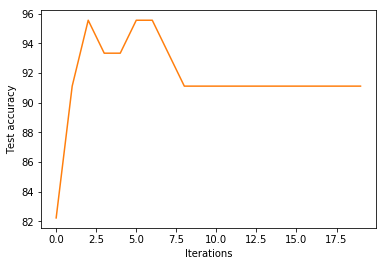

In [51]:
plt.plot(test_acc_lea)
plt.xlabel('Iterations')
plt.ylabel('Test accuracy')
plt.show()

# (b)

In [11]:
temp_X, test_X, temp_Y, test_Y = train_test_split(X,Y,random_state=1,test_size=0.3)
train_X, pool_X, train_Y, pool_Y = train_test_split(temp_X, temp_Y,random_state=1, test_size= 6/7)
n_q=30

x0, x1 = np.meshgrid(np.arange(np.amin(X[:,0])-0.05, np.amax(X[:,0])+0.05, 0.01), np.arange(np.min(X[:,1])-0.05, np.max(X[:,1])+0.05, 0.01))

ex=gaussian_naive_bias(train_X, train_Y)
ex_pred=ex.naive_bayes(np.c_[x0.ravel(), x1.ravel()], Y)
ex_pred = ex_pred.reshape(x0.shape)

plt.gcf().clear()
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired_r)
plt.pcolormesh(x0, x1, ex_pred, alpha=0.1, cmap=plt.cm.Paired_r)
plt.title('Query: 0')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Petal width(cm)')
# plt.show()
filename='000.png'
plt.savefig(filename, dpi=96)
plt.gca()
# plt.show()
# test_acc_lea = []
for i in range(n_q):
    plt.gcf().clear()
    ac_lear = gaussian_naive_bias(train_X, train_Y)
    y_pred = ac_lear.naive_bayes(pool_X, pool_Y)
    
    uncer_lea=ac_lear.uncer_lea.copy()
    train_X=np.vstack([train_X,pool_X[uncer_lea,:]])
    train_Y=np.append(train_Y,pool_Y[uncer_lea])
    
    pool_X = np.delete(pool_X, (uncer_lea), axis=0)
    pool_Y = np.delete(pool_Y, (uncer_lea))
    
    ex=gaussian_naive_bias(train_X, train_Y)
    ex_pred=ex.naive_bayes(np.c_[x0.ravel(), x1.ravel()], Y)
    ex_pred = ex_pred.reshape(x0.shape)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired_r)
    plt.pcolormesh(x0, x1, ex_pred, alpha=0.1, cmap=plt.cm.Paired_r)
    plt.title('Query: '+str(i+1))
    plt.xlabel('Sepal length(cm)')
    plt.ylabel('Petal width(cm)')
#     plt.show()
    
    filename=str(format(i+1, '03d'))+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

In [12]:
! convert -delay 15 *.png Q2b.gif
from IPython.display import Image
Image(url='Q2b.gif') 

In [42]:
temp_X, test_X, temp_Y, test_Y = train_test_split(X,Y,random_state=1,test_size=0.3)
train_X, pool_X, train_Y, pool_Y = train_test_split(temp_X, temp_Y,random_state=1, test_size= 6/7)
n_q=30

x0, x1 = np.meshgrid(np.arange(np.amin(X[:,0])-0.05, np.amax(X[:,0])+0.05, 0.01), np.arange(np.min(X[:,1])-0.05, np.max(X[:,1])+0.05, 0.01))

ex=gaussian_naive_bias(train_X, train_Y)
ex_pred=ex.naive_bayes(np.c_[x0.ravel(), x1.ravel()], Y)
ex_pred = ex_pred.reshape(x0.shape)

plt.gcf().clear()
plt.scatter(train_X[:,0], train_X[:,1], c=train_Y, cmap=plt.cm.Paired_r)
plt.pcolormesh(x0, x1, ex_pred, alpha=0.1, cmap=plt.cm.Paired_r)
plt.title('Query: 0')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Petal width(cm)')
# plt.show()
filename='000.png'
plt.savefig(filename, dpi=96)
plt.gca()
# plt.show()
# test_acc_lea = []
for i in range(n_q):
    plt.gcf().clear()
    ac_lear = gaussian_naive_bias(train_X, train_Y)
    y_pred = ac_lear.naive_bayes(pool_X, pool_Y)
    
    uncer_lea=ac_lear.uncer_lea.copy()
    train_X=np.vstack([train_X,pool_X[uncer_lea,:]])
    train_Y=np.append(train_Y,pool_Y[uncer_lea])
    
    pool_X = np.delete(pool_X, (uncer_lea), axis=0)
    pool_Y = np.delete(pool_Y, (uncer_lea))
    
    ex=gaussian_naive_bias(train_X, train_Y)
    ex_pred=ex.naive_bayes(np.c_[x0.ravel(), x1.ravel()], Y)
    ex_pred = ex_pred.reshape(x0.shape)
    plt.scatter(train_X[:,0], train_X[:,1], c=train_Y, cmap=plt.cm.Paired_r)
    plt.pcolormesh(x0, x1, ex_pred, alpha=0.1, cmap=plt.cm.Paired_r)
    plt.title('Query: '+str(i+1))
    plt.xlabel('Sepal length(cm)')
    plt.ylabel('Petal width(cm)')
#     plt.show()
    
    filename=str(format(i+1, '03d'))+'.jpg'
    plt.savefig(filename, dpi=96)
    plt.gca()

In [45]:
! convert -delay 25 *.jpg Q2bb.gif
from IPython.display import Image
Image(url='Q2bb.gif') 

# (c)

In [52]:
temp_X, test_X, temp_Y, test_Y = train_test_split(X,Y,random_state=5,test_size=0.3)
train_X, pool_X, train_Y, pool_Y = train_test_split(temp_X, temp_Y,random_state=1, test_size= 6/7)

test_acc_rand = np.zeros((5,n_q))
for r in range(5):
    temp_X, test_X, temp_Y, test_Y = train_test_split(X,Y,random_state=12,test_size=0.3)
    train_X, pool_X, train_Y, pool_Y = train_test_split(temp_X, temp_Y,random_state=1, test_size= 6/7)
    np.random.seed(r)
    for i in range(n_q):
        ac_lear = gaussian_naive_bias(train_X, train_Y)
        y_pred = ac_lear.naive_bayes(pool_X, pool_Y)

        uncer_rand=ac_lear.uncer_rand
        train_X=np.vstack([train_X,pool_X[uncer_rand,:]])
        train_Y=np.append(train_Y,pool_Y[uncer_rand])

        pool_X = np.delete(pool_X, (uncer_rand), axis=0)
        pool_Y = np.delete(pool_Y, (uncer_rand))

        test = gaussian_naive_bias(train_X, train_Y)
        test_pred = test.naive_bayes(test_X, test_Y)
        test_acc_rand[r,i]=test.accuracy()

In [53]:
# # for r in range(5):
# #     plt.plot(np.mean(test_acc_rand[r,:]))
# plt.errorbar(range(n_q),[np.mean(test_acc_rand)]*n_q, [np.std(test_acc_rand)]*n_q)
# # plt.plot([np.std(test_acc_rand)]*n_q)
# plt.plot(test_acc_lea)
# plt.legend(['Mean of random estimation', 'Standard deviation of random estimation', 'Least confidence'])
# plt.show()

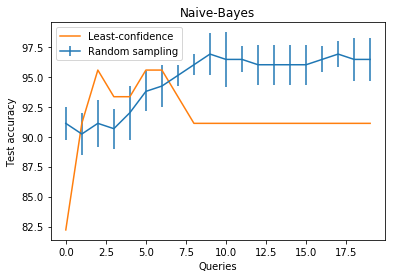

In [54]:
n_q=20
# plt.plot([np.mean(test_acc_rand)]*n_q)
# plt.plot([np.mean(test_acc_rand)+np.std(test_acc_rand)]*n_q, 'k',linestyle='--')
# plt.plot([np.mean(test_acc_rand)-np.std(test_acc_rand)]*n_q, 'k',linestyle='--')
plt.gcf().clear()
plt.errorbar(range(n_q), np.mean(test_acc_rand,axis=0), np.std(test_acc_rand, axis=0))
plt.plot(test_acc_lea)
plt.xlabel('Queries')
plt.ylabel('Test accuracy')
plt.title('Naive-Bayes')
plt.legend(['Least-confidence', 'Random sampling'])
plt.show()